In [1]:
# look at ITL fits files generated by TS3, analysis by Jim Chiang et al. We are looking at QE
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import astropy as ast
import astropy.stats
from astropy.io import fits
import scipy as sc
import scipy.signal
import textwrap
import pylab

# this magic command makes plots appear within the notebook
%matplotlib inline

# define figure size parameters to make figures larger than default
figwidth=10
figheight=10

In [2]:
def plotqe(vend,number,ok):
    # open the file, extract the info, and plot each segment
    #number="017"
    #vend="ITL"
    #ok=[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
    if vend=='ITL':
        filename=vend+'-3800C-'+number+'_QE.fits'
    elif vend=='E2V':
        filename=vend+'-CCD250-'+number+'_QE.fits'
    else:
        print('ERROR in vendor type')
    #print (filename)
    hdulist=fits.open(filename)
    #hdulist.info()
    # print first extension's header
    #print ("----------extension 1 header-------------") # amplifier-specific header info, mostly pixel placement information
    #print ("  ")
    #print (textwrap.fill(str(hdulist[1].header),80)) 
    qedata=hdulist[1].data
    # kludge for ITL-021, which has corrupted (nan) data
    if filename=='ITL-3800C-021_QE.fits':
        avg=(ok[2]*qedata['AMP02']+ok[3]*qedata['AMP03']+ok[4]*qedata['AMP04']+ok[5]*qedata['AMP05']+ok[6]*qedata['AMP06']+ok[7]*qedata['AMP07']+ok[8]*qedata['AMP08']+ok[9]*qedata['AMP09']+ok[10]*qedata['AMP10']+ok[11]*qedata['AMP11']+ok[12]*qedata['AMP12']+ok[13]*qedata['AMP13']+ok[14]*qedata['AMP14']+ok[15]*qedata['AMP15'])/sum(ok)
    else:
        avg=(ok[1]*qedata['AMP01']+ok[2]*qedata['AMP02']+ok[3]*qedata['AMP03']+ok[4]*qedata['AMP04']+ok[5]*qedata['AMP05']+ok[6]*qedata['AMP06']+ok[7]*qedata['AMP07']+ok[8]*qedata['AMP08']+ok[9]*qedata['AMP09']+ok[10]*qedata['AMP10']+ok[11]*qedata['AMP11']+ok[12]*qedata['AMP12']+ok[13]*qedata['AMP13']+ok[14]*qedata['AMP14']+ok[15]*qedata['AMP15']+ok[16]*qedata['AMP16'])/sum(ok)
    #print (avg)
    #print(qedata)
    wavelength=qedata['WAVELENGTH']
    fig1=plt.figure(1,[figwidth,figheight])
    #fig1.ylabel('QE')
    fig1.suptitle(vend+'-'+number, fontsize=16)
    plt.scatter(wavelength, qedata['AMP01'], 15,'b','$1$')
    plt.scatter(wavelength, qedata['AMP02'], 15,'b','$2$')
    plt.scatter(wavelength, qedata['AMP03'], 15,'b','$3$')
    plt.scatter(wavelength, qedata['AMP04'], 15,'b','$4$')
    plt.scatter(wavelength, qedata['AMP05'], 15,'b','$5$')
    plt.scatter(wavelength, qedata['AMP06'], 15,'b','$6$')
    plt.scatter(wavelength, qedata['AMP07'], 15,'b','$7$')
    plt.scatter(wavelength, qedata['AMP08'], 15,'b','$8$')
    plt.scatter(wavelength, qedata['AMP09'], 15,'b','$9$')
    plt.scatter(wavelength, qedata['AMP10'], 15,'b','$A$')
    plt.scatter(wavelength, qedata['AMP11'], 15,'b','$B$')
    plt.scatter(wavelength, qedata['AMP12'], 15,'b','$C$')
    plt.scatter(wavelength, qedata['AMP13'], 15,'b','$D$')
    plt.scatter(wavelength, qedata['AMP14'], 15,'b','$E$')
    plt.scatter(wavelength, qedata['AMP15'], 15,'b','$F$')
    plt.scatter(wavelength, qedata['AMP16'], 15,'b','$G$')
    plt.scatter(wavelength, avg, 30,'r')
    ax=fig1.gca()
    ax.grid(True)
    ax.set_xticks(np.arange(300, 1150, 50.))
    ax.set_yticks(np.arange(0, 110., 5.))
    if sum(ok)!=16:
        plt.annotate('NOTE: some segments not included in average', xy=(0.15, 0.25), xycoords='axes fraction')
    fig1.savefig(vend+'test-'+number+'.pdf')
    label=vend+'-'+number
    zz=[wavelength,avg,label]
    #print(label)
    return zz;

In [3]:
# inititialization
ok=[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1] # AMPs to include in average -- throw away index 0 to match
itlsensor=[[]]
itllabel=['junk']
e2vsensor=[[]]
e2vlabel=['junk']
cmap = { 0:'r',1:'g',2:'b',3:'c',4:'m',5:'y',6:'k',7:'gray',8:'orange',9:'darkslateblue',10:'coral',11:'darkblue',12:'darkred' }

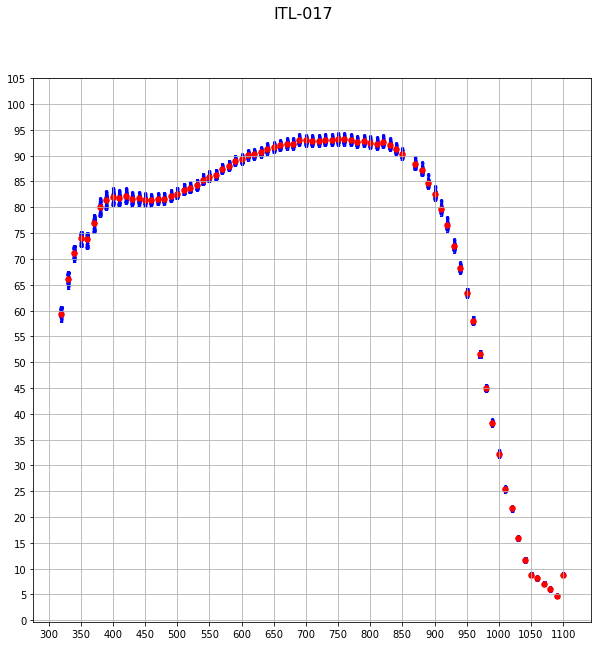

In [4]:
qecurve=plotqe('ITL','017',ok)
itlsuper=qecurve[1]
itlsensor.append(qecurve[1])
itllabel.append(qecurve[2])

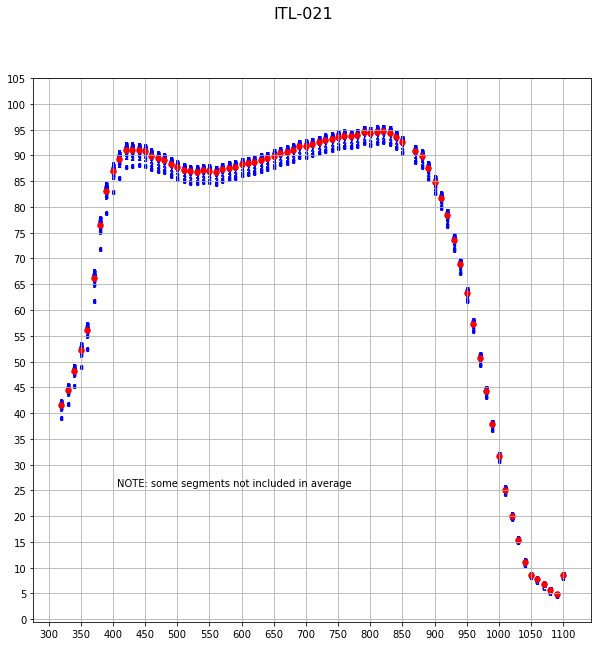

In [5]:
ok=[0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0] #remove amps 1 and 16 from the average, then put them back for the next sensor
qecurve=plotqe('ITL','021',ok)
ok=[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
itlsuper=itlsuper+qecurve[1]
itlsensor.append(qecurve[1])
itllabel.append(qecurve[2])

In [6]:
#print(qecurve[1])

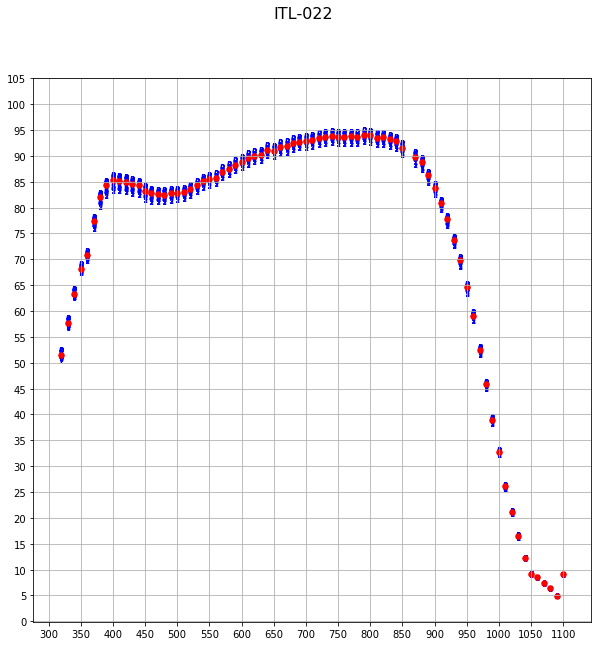

In [7]:
qecurve=plotqe('ITL','022',ok)
itlsuper=itlsuper+qecurve[1]
itlsensor.append(qecurve[1])
itllabel.append(qecurve[2])

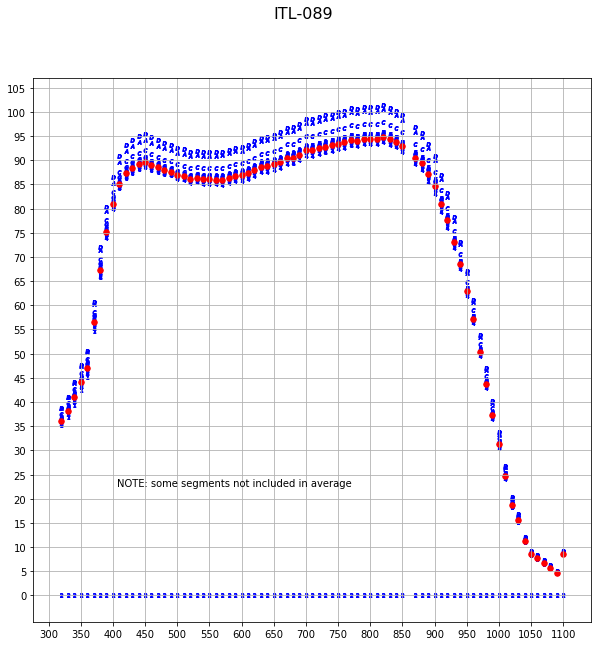

In [8]:
ok=[0,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,1] # AMPs to include in average -- throw away index 0 to match
qecurve=plotqe('ITL','089',ok)
ok=[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1] # AMPs to include in average -- throw away index 0 to match
itlsuper=itlsuper+qecurve[1]
itlsensor.append(qecurve[1])
itllabel.append(qecurve[2])

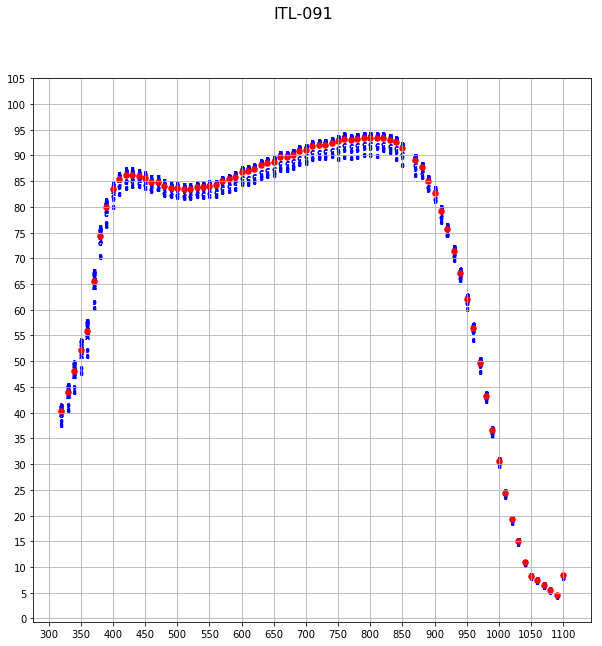

In [9]:
qecurve=plotqe('ITL','091',ok)
itlsuper=itlsuper+qecurve[1]
itlsensor.append(qecurve[1])
itllabel.append(qecurve[2])

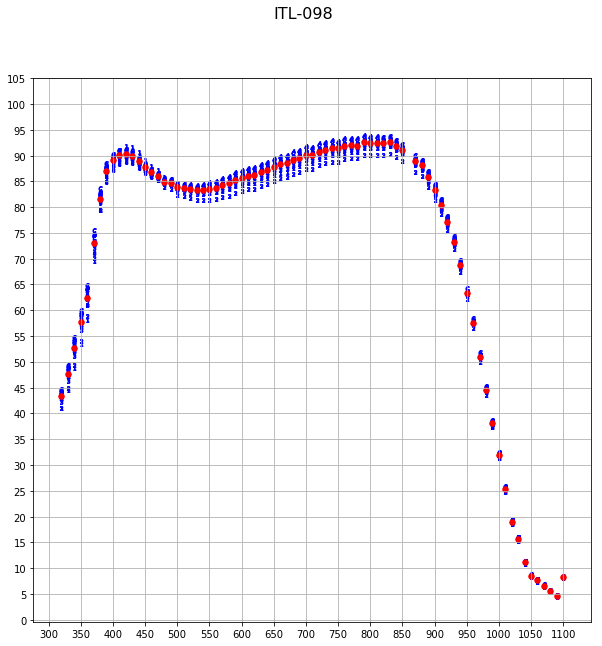

In [10]:
qecurve=plotqe('ITL','098',ok)
itlsuper=itlsuper+qecurve[1]
itlsensor.append(qecurve[1])
itllabel.append(qecurve[2])

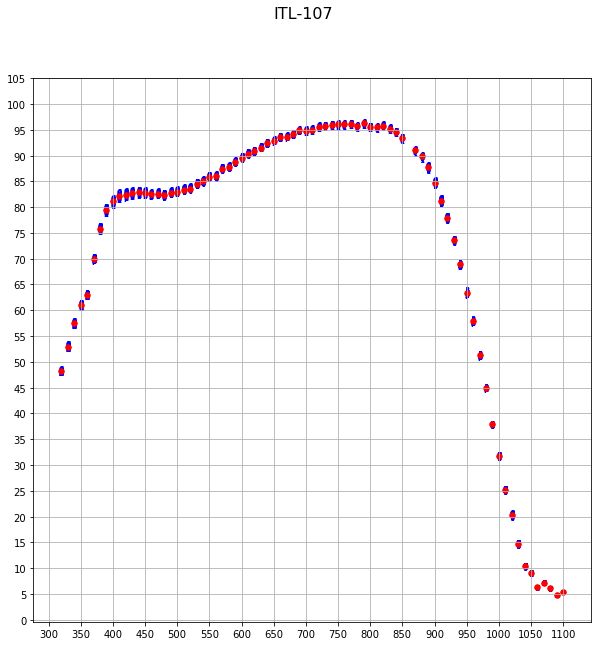

In [11]:
qecurve=plotqe('ITL','107',ok)
itlsuper=itlsuper+qecurve[1]
itlsensor.append(qecurve[1])
itllabel.append(qecurve[2])

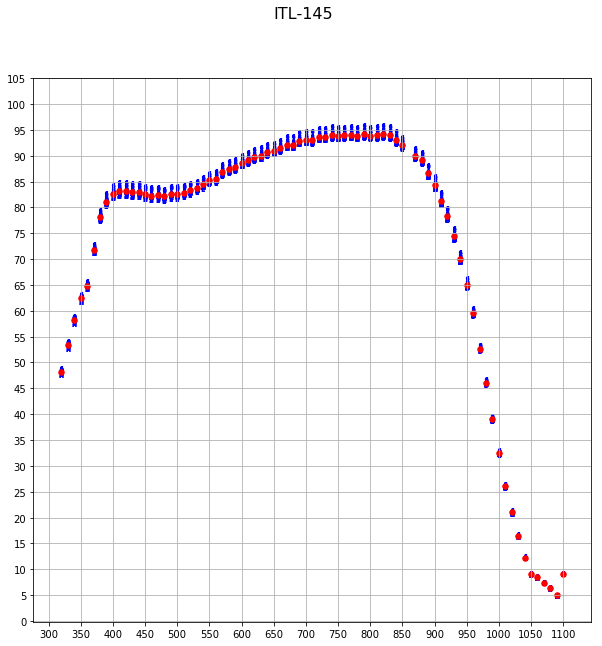

In [12]:
qecurve=plotqe('ITL','145',ok)
itlsuper=itlsuper+qecurve[1]
itlsensor.append(qecurve[1])
itllabel.append(qecurve[2])

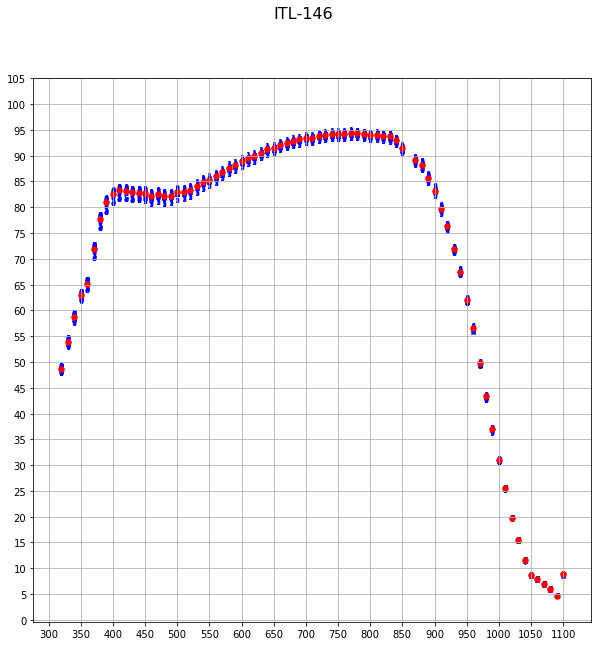

In [13]:
qecurve=plotqe('ITL','146',ok)
itlsuper=itlsuper+qecurve[1]
itlsensor.append(qecurve[1])
itllabel.append(qecurve[2])

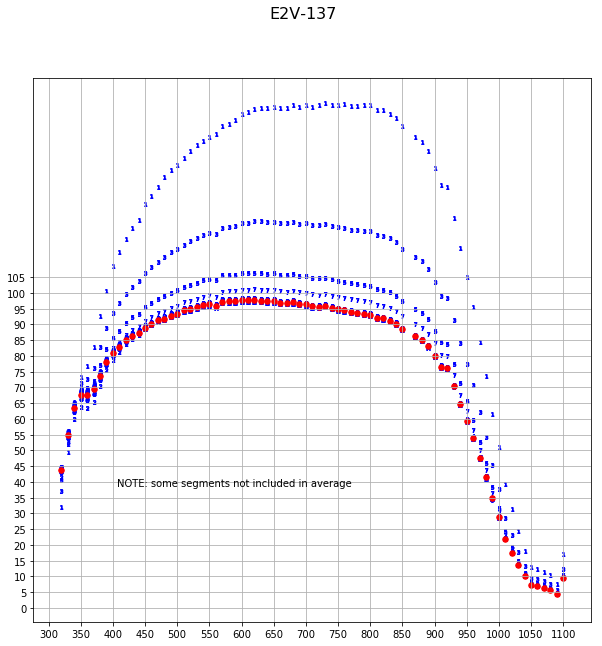

In [14]:
ok=[0,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1] #remove amps 1, 3, 5, 7 from the average, then put them back for the next sensor
qecurve=plotqe('E2V','137',ok)
ok=[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
e2vsuper=qecurve[1]
e2vsensor.append(qecurve[1])
e2vlabel.append(qecurve[2])


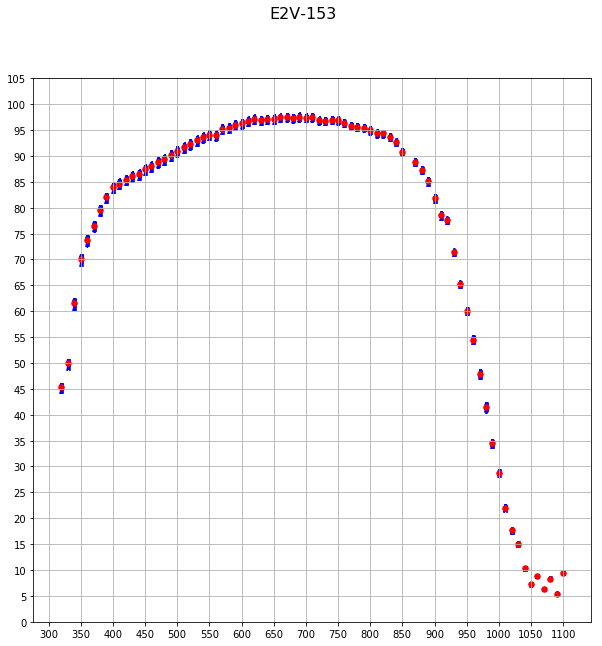

In [15]:
qecurve=plotqe('E2V','153',ok)
e2vsuper=e2vsuper+qecurve[1]
e2vsensor.append(qecurve[1])
e2vlabel.append(qecurve[2])

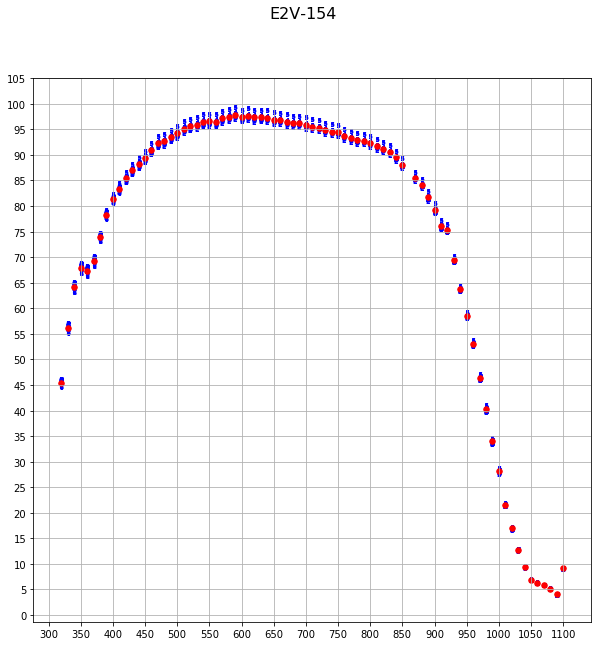

In [16]:
qecurve=plotqe('E2V','154',ok)
e2vsuper=e2vsuper+qecurve[1]
e2vsensor.append(qecurve[1])
e2vlabel.append(qecurve[2])

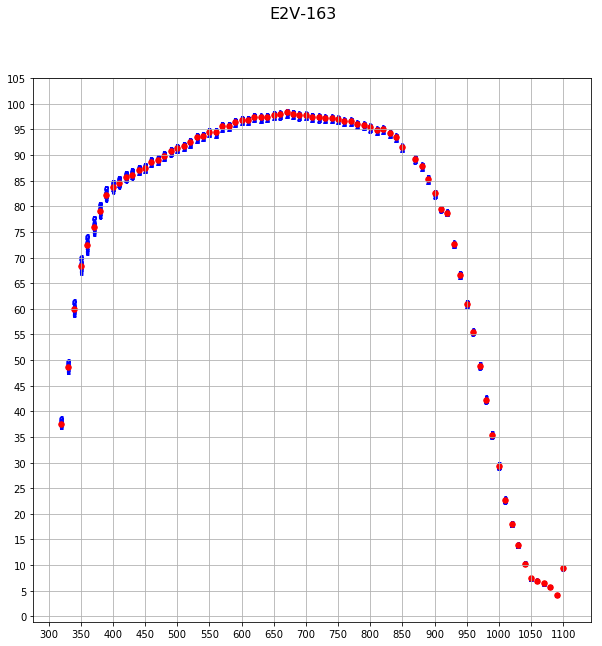

In [17]:
qecurve=plotqe('E2V','163',ok)
e2vsuper=e2vsuper+qecurve[1]
e2vsensor.append(qecurve[1])
e2vlabel.append(qecurve[2])

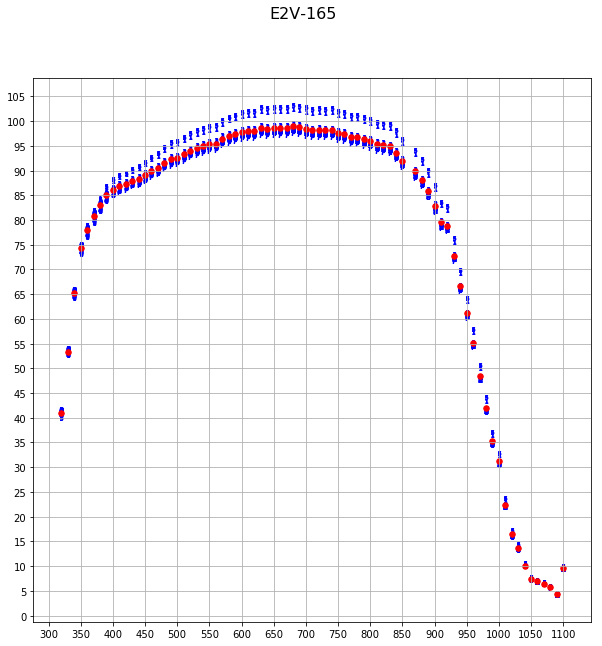

In [18]:
#ok=[0,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1] #remove amps 1, 3, 5, 7 from the average, then put them back for the next sensor
qecurve=plotqe('E2V','165',ok)
#ok=[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
e2vsuper=e2vsuper+qecurve[1]
e2vsensor.append(qecurve[1])
e2vlabel.append(qecurve[2])

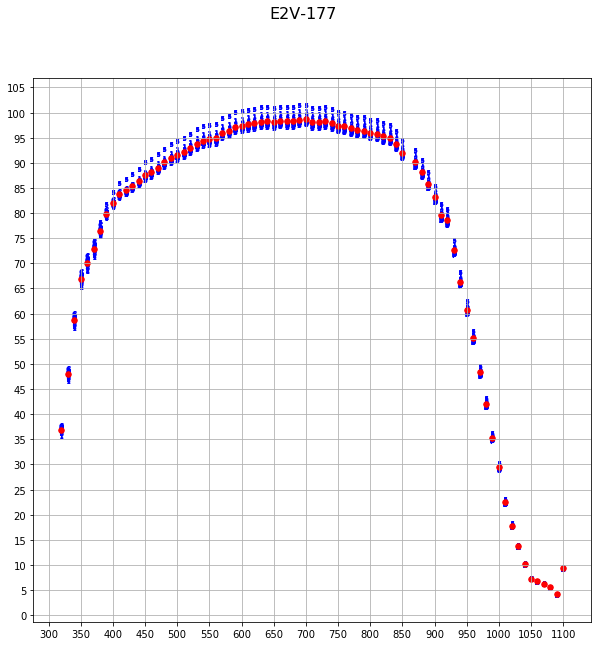

In [19]:
qecurve=plotqe('E2V','177',ok)
e2vsuper=e2vsuper+qecurve[1]
e2vsensor.append(qecurve[1])
e2vlabel.append(qecurve[2])

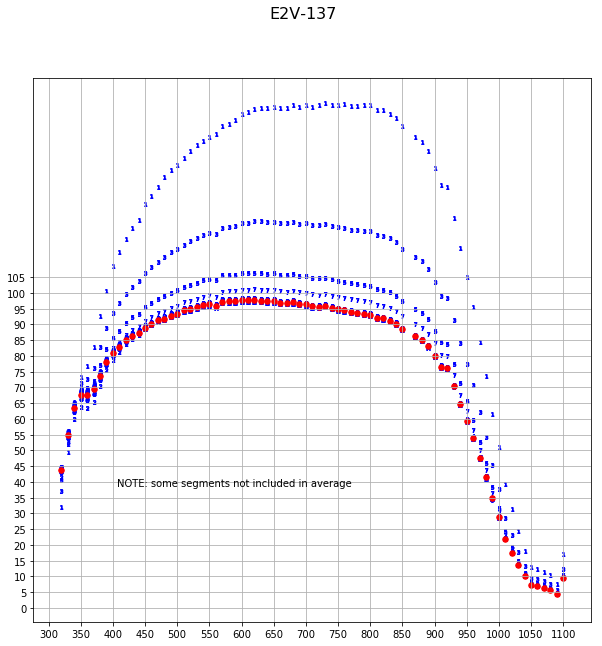

In [20]:
ok=[0,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1] #remove amps 1, 3, 5, 7 from the average, then put them back for the next sensor
qecurve=plotqe('E2V','137',ok)
ok=[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
e2vsuper=e2vsuper+qecurve[1]
e2vsensor.append(qecurve[1])
e2vlabel.append(qecurve[2])

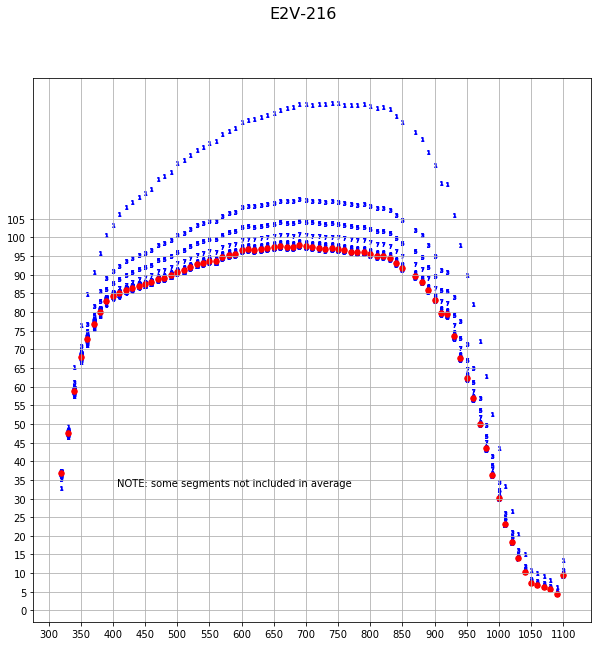

In [21]:
ok=[0,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1] #remove amps 1, 3, 5, 7 from the average, then put them back for the next sensor
qecurve=plotqe('E2V','216',ok)
ok=[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
e2vsuper=e2vsuper+qecurve[1]
e2vsensor.append(qecurve[1])
e2vlabel.append(qecurve[2])

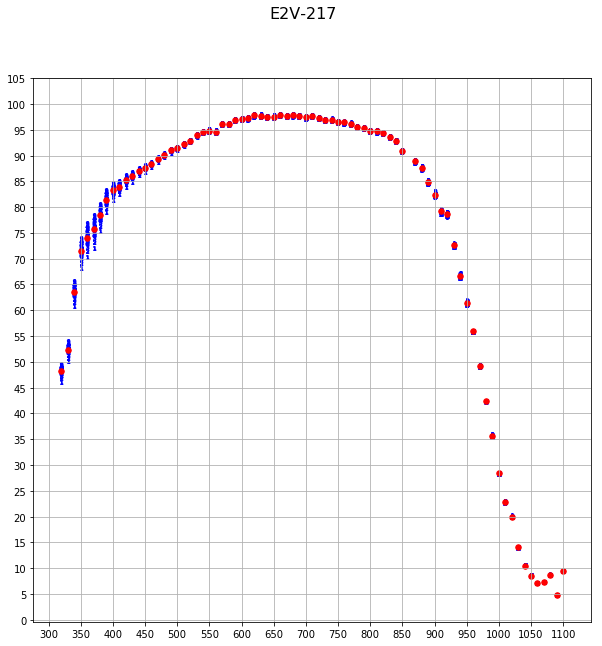

In [22]:
qecurve=plotqe('E2V','217',ok)
e2vsuper=e2vsuper+qecurve[1]
e2vsensor.append(qecurve[1])
e2vlabel.append(qecurve[2])

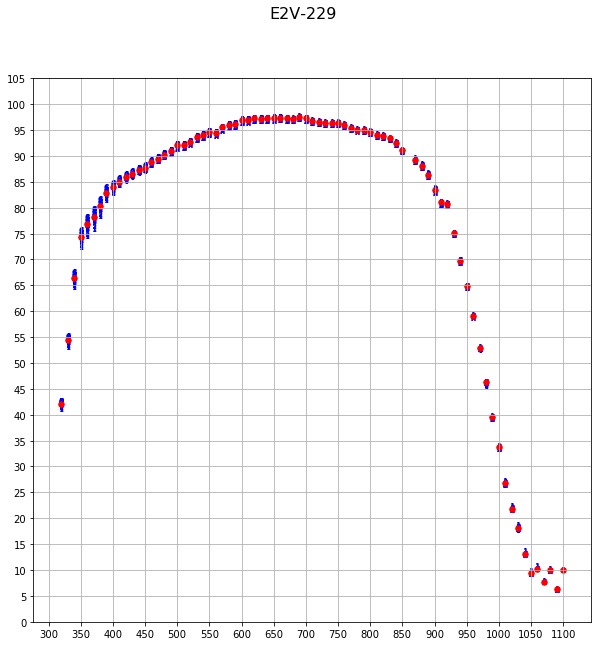

In [23]:
qecurve=plotqe('E2V','229',ok)
e2vsuper=e2vsuper+qecurve[1]
e2vsensor.append(qecurve[1])
e2vlabel.append(qecurve[2])

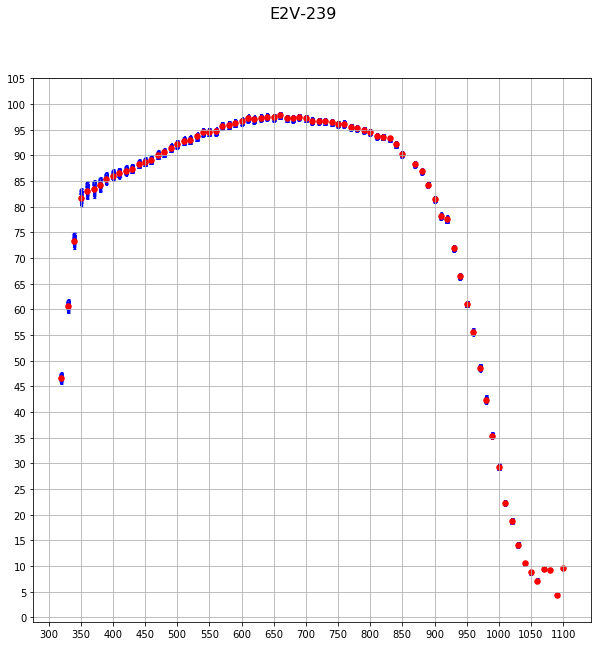

In [24]:
qecurve=plotqe('E2V','239',ok)
e2vsuper=e2vsuper+qecurve[1]
e2vsensor.append(qecurve[1])
e2vlabel.append(qecurve[2])

In [25]:
#print(len(itlsensor))
#print(itlsensor[2])
#print(itllabel)
#print(len(e2vsensor))

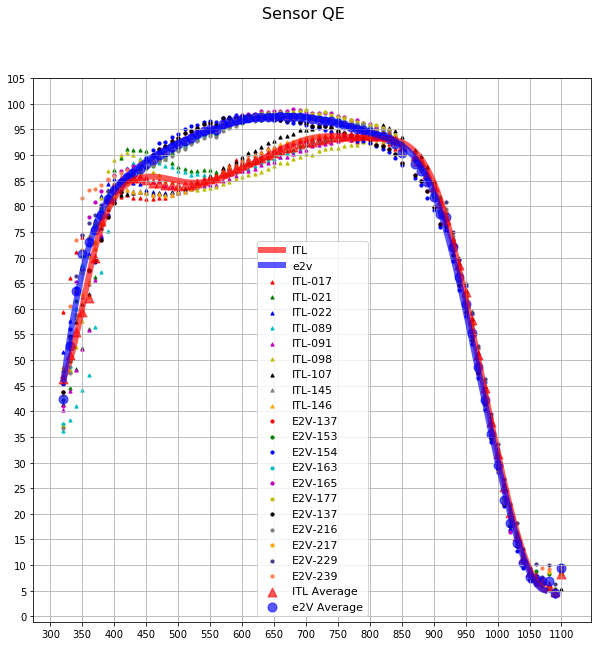

In [26]:
wavelength=qecurve[0]
superavg=itlsuper/(len(itlsensor)-1)
#print(superavg)
superavge=e2vsuper/(len(e2vsensor)-1)
# now let's interpolate
from scipy import interpolate
#itl=interpolate.interp1d(wavelength,superavg,kind='cubic')
#e2v=interpolate.interp1d(wavelength,superavge,kind='cubic')
itl=interpolate.UnivariateSpline(wavelength,superavg)
e2v=interpolate.UnivariateSpline(wavelength,superavge)
lambda1=np.arange(321,1075,1)
itlcurve=itl(lambda1)
e2vcurve=e2v(lambda1)
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('Sensor QE', fontsize=16)
plt.plot(lambda1, itlcurve,'r',linewidth=6,label='ITL',alpha=0.65)
plt.plot(lambda1, e2vcurve,'b', linewidth=6, label='e2v',alpha=0.65)
for i in range(1,len(itlsensor)):
    plt.scatter(wavelength, itlsensor[i], 10,cmap[(i-1)%(len(cmap))],'^',label=itllabel[i])
for i in range(1,len(e2vsensor)):
    plt.scatter(wavelength, e2vsensor[i], 10,cmap[(i-1)%(len(cmap))],'o',label=e2vlabel[i])
plt.scatter(wavelength, superavg, 80,'r','^',label='ITL Average', alpha=0.65)
plt.scatter(wavelength, superavge, 80,'b', label='e2V Average', alpha=0.65)
#plt.scatter(wavelength, avg179e, 50,'y', label='e2V-179')
#fig1.legend(loc=2,prop={'size':6})
pylab.legend(loc='lower center',prop={'size':11})
ax=fig1.gca()
ax.grid(True)
ax.set_xticks(np.arange(300, 1150, 50.))
ax.set_yticks(np.arange(0, 110., 5.))
fig1.savefig('SensorQE.pdf')

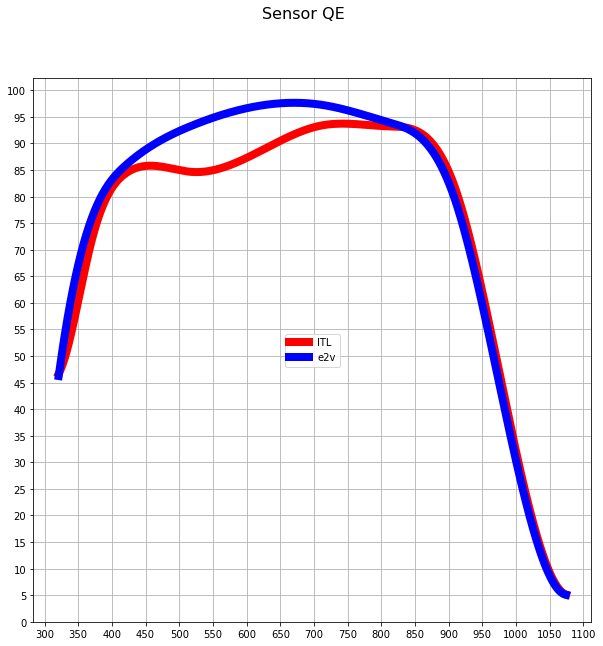

In [27]:

fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('Sensor QE', fontsize=16)
plt.plot(lambda1, itlcurve,'r',linewidth=8,label='ITL')
plt.plot(lambda1, e2vcurve,'b', linewidth=8, label='e2v')
pylab.legend(loc='center')
ax=fig1.gca()
ax.set_xticks(np.arange(300, 1150, 50.))
ax.set_yticks(np.arange(0, 105., 5.))
ax.grid(True)
fig1.savefig('qecurves.pdf')
# and output
file1 = open("itl2017july24.txt","w")
for i in range(len(lambda1)):
    print (round(lambda1[i],1),round(itlcurve[i],1), file=file1)
file1.close()
file1 = open("e2v2017july24.txt","w")
for i in range(len(lambda1)):
    print (round(lambda1[i],1),round(e2vcurve[i],1), file=file1)
file1.close()

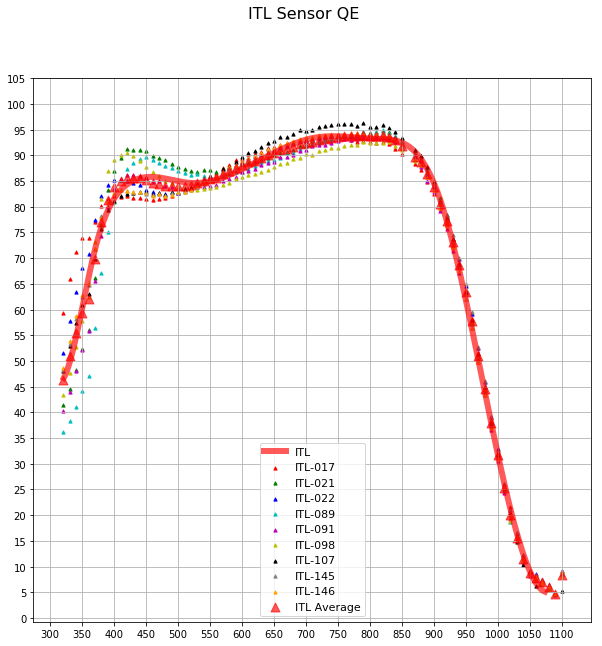

In [28]:
# now ITL only
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL Sensor QE', fontsize=16)
plt.plot(lambda1, itlcurve,'r',linewidth=6,label='ITL',alpha=0.65)
for i in range(1,len(itlsensor)):
    plt.scatter(wavelength, itlsensor[i], 10,cmap[(i-1)%(len(cmap))],'^',label=itllabel[i])
plt.scatter(wavelength, superavg, 80,'r','^',label='ITL Average', alpha=0.65)
pylab.legend(loc='lower center',prop={'size':11})
ax=fig1.gca()
ax.grid(True)
ax.set_xticks(np.arange(300, 1150, 50.))
ax.set_yticks(np.arange(0, 110., 5.))
fig1.savefig('SensorQE-ITL.pdf')